In [1]:
import numpy as np
import seaborn as sb
import pandas as pd

In [5]:
df = pd.read_excel('crop_yield_prediction.xlsx')

In [6]:
df.head()

,S.No,Crop,District,Year,Min Temp,Max. Temp,Total Rainfall,Total Yield
0,1,bengal gram,ADILABAD,2016,12.34,42.66,1130.150000,1551
1,10,bengal gram,BHADRADRI,2016,16.42,42.65,1145.008696,0
2,19,bengal gram,HYDERABAD,2016,17.52,41.88,885.481250,0
3,28,bengal gram,JAGTIAL,2016,12.84,43.34,960.355556,1299
4,37,bengal gram,JANGAON,2016,15.99,41.87,978.676923,1299


In [7]:
df["Crop"].unique()

array(['bengal gram', 'groundnut', 'maize'], dtype=object)

In [8]:
df["District"].unique()

array(['ADILABAD', 'BHADRADRI', 'HYDERABAD', 'JAGTIAL', 'JANGAON',
       'JAYASHANKAR', 'JOGULAMBA', 'KAMAREDDY', 'KARIMNAGAR', 'KHAMMAM',
       'KOMARAM BHEEM', 'MAHABUBABAD', 'MAHABUBNAGAR', 'MANCHERIAL',
       'MEDAK', 'MEDCHAL MALKAJG', 'NAGARKURNOOL', 'NALGONDA', 'NIRMAL',
       'NIZAMABAD', 'PEDDAPALLI', 'RAJANNA', 'RANGAREDDY', 'SANGAREDDY',
       'SIDDIPET', 'SURYAPET', 'VIKARABAD', 'WANAPARTHY',
       'WARANGAL RURAL', 'WARANGAL URBAN', 'YADADRI'], dtype=object)

In [9]:
df["Year"].unique()

array([2016, 2017, 2018], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S.No            279 non-null    int64  
 1   Crop            279 non-null    object 
 2   District        279 non-null    object 
 3   Year            279 non-null    int64  
 4   Min Temp        279 non-null    float64
 5   Max. Temp       279 non-null    float64
 6   Total Rainfall  279 non-null    float64
 7   Total Yield     279 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 17.6+ KB


In [11]:
df.isnull().sum()

S.No              0
Crop              0
District          0
Year              0
Min Temp          0
Max. Temp         0
Total Rainfall    0
Total Yield       0
dtype: int64

In [12]:
df.shape

(279, 8)

<AxesSubplot: >

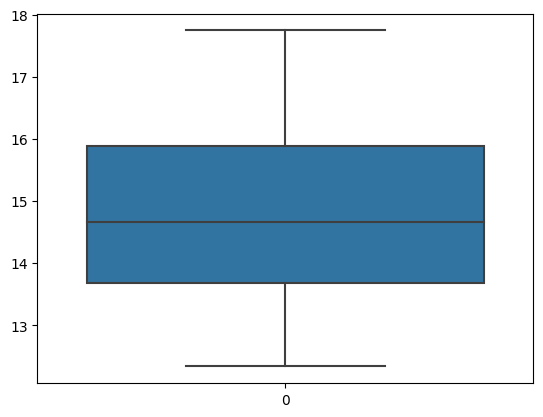

In [14]:
sb.boxplot(df['Min Temp'])

<AxesSubplot: >

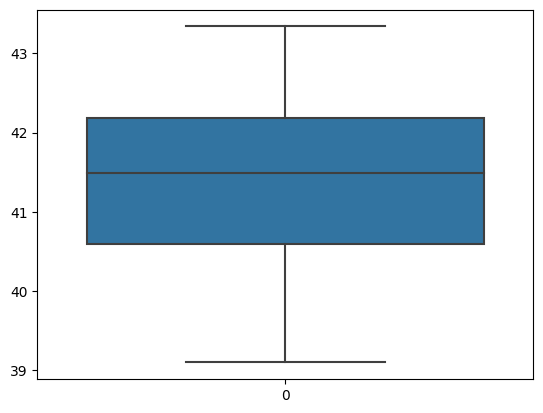

In [16]:
sb.boxplot(df['Max. Temp'])

<AxesSubplot: >

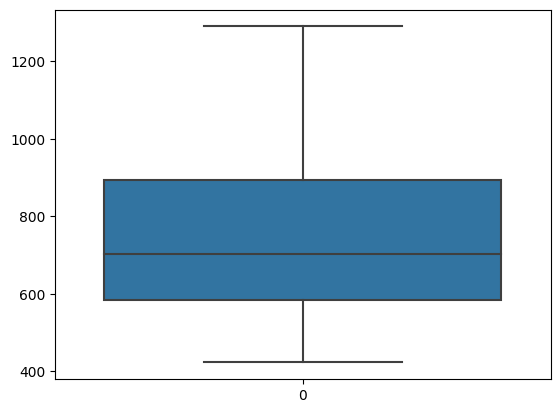

In [17]:
sb.boxplot(df['Total Rainfall'])

<AxesSubplot: >

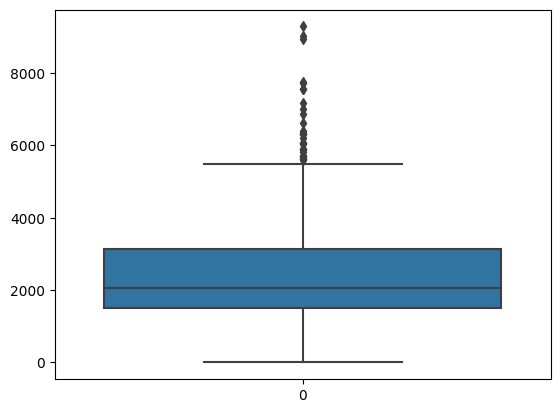

In [18]:
sb.boxplot(df['Total Yield'])

# Removing outliers of minimum temperature

In [19]:
Q1 = np.percentile(df["Min Temp"],25,interpolation="midpoint")
Q3 = np.percentile(df["Min Temp"],75,interpolation="midpoint")
IQR = Q3-Q1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12880\2275980713.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["Min Temp"],25,interpolation="midpoint")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12880\2275980713.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df["Min Temp"],75,interpolation="midpoint")


In [20]:
upper = np.where(df['Min Temp'] >= (Q3+1.5*IQR))
lower = np.where(df['Min Temp'] <= (Q1-1.5*IQR))

In [22]:
print("old shape : ", df.shape)

old shape :  (279, 8)


In [24]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape : ", df.shape)

new shape :  (279, 8)


# Removing outliers of maximum temperature

In [25]:
Q1 = np.percentile(df["Max. Temp"],25,interpolation="midpoint")
Q3 = np.percentile(df["Max. Temp"],75,interpolation="midpoint")
IQR = Q3-Q1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12880\4224182228.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["Max. Temp"],25,interpolation="midpoint")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12880\4224182228.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df["Max. Temp"],75,interpolation="midpoint")


In [26]:
upper = np.where(df['Max. Temp'] >= (Q3+1.5*IQR))
lower = np.where(df['Max. Temp'] <= (Q1-1.5*IQR))

In [27]:
print("old shape : ", df.shape)

old shape :  (279, 8)


In [28]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape : ", df.shape)

new shape :  (279, 8)


# Removing outliers of total rainfall

In [29]:
Q1 = np.percentile(df["Total Rainfall"],25,interpolation="midpoint")
Q3 = np.percentile(df["Total Rainfall"],75,interpolation="midpoint")
IQR = Q3-Q1

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12880\668819811.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df["Total Rainfall"],25,interpolation="midpoint")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12880\668819811.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df["Total Rainfall"],75,interpolation="midpoint")


In [30]:
upper = np.where(df['Total Rainfall'] >= (Q3+1.5*IQR))
lower = np.where(df['Total Rainfall'] <= (Q1-1.5*IQR))

In [31]:
print("old shape : ", df.shape)

old shape :  (279, 8)


In [32]:
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
print("new shape : ", df.shape)

new shape :  (279, 8)


# Graphical Analysis 

In [33]:
df.columns

Index(['S.No', 'Crop', 'District', 'Year', 'Min Temp', 'Max. Temp',
       'Total Rainfall', 'Total Yield'],
      dtype='object')

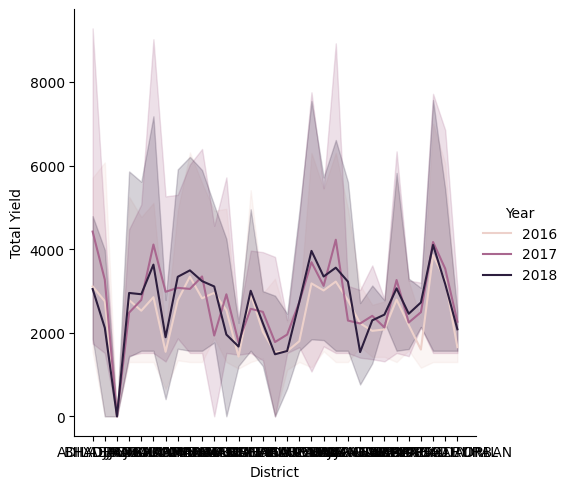

In [34]:
sb.relplot(data = df,x="District",y="Total Yield",hue="Year",kind="line")

In [36]:
dist = (df['Crop'])
dist = set(dist)
dist = list(dist)
dist = {dist[i] : i for i  in range(0,len(dist))}
df["Crop"] = df["Crop"].map(dist)

In [37]:
dist = (df['District'])
dist = set(dist)
dist = list(dist)
dist = {dist[i] : i for i  in range(0,len(dist))}
df["District"] = df["District"].map(dist)

In [40]:
df.head()

,S.No,Crop,District,Year,Min Temp,Max. Temp,Total Rainfall,Total Yield
0,1,1,27,2016,12.34,42.66,1130.150000,1551
1,10,1,5,2016,16.42,42.65,1145.008696,0
2,19,1,28,2016,17.52,41.88,885.481250,0
3,28,1,3,2016,12.84,43.34,960.355556,1299
4,37,1,0,2016,15.99,41.87,978.676923,1299


In [41]:
import matplotlib.pyplot as plt

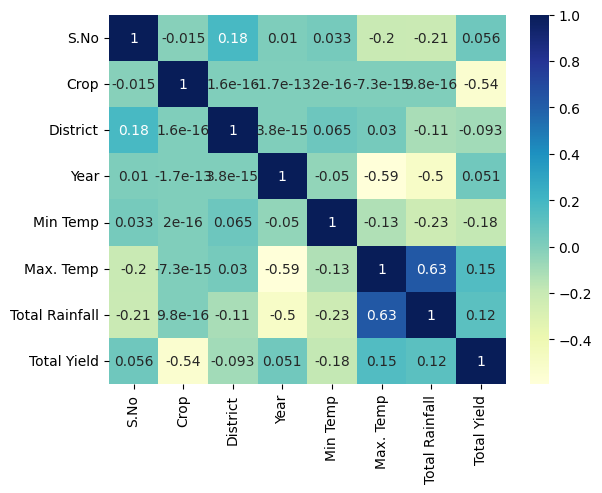

In [42]:
sb.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

# Splitting training set and testing set

In [43]:
df.columns

Index(['S.No', 'Crop', 'District', 'Year', 'Min Temp', 'Max. Temp',
       'Total Rainfall', 'Total Yield'],
      dtype='object')

In [44]:
features = df[['Crop','District','Year','Min Temp','Max. Temp','Total Rainfall']]
labels = df['Total Yield']

# Random Forest Regressor model

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=2)

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

model = RandomForestRegressor(max_depth=1000,random_state=0)
model.fit(Xtrain,Ytrain)

RandomForestRegressor(max_depth=1000, random_state=0)

In [63]:
y_pred = model.predict(x_test)

In [58]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2418.26
7,1340,1261.98
99,2025,1946.79
13,1299,1304.59
112,2044,2280.29


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6446028256723813

In [51]:
user_input = pd.DataFrame({
    'Crop':2,
    'District':27,
    'Year':2018,
    'Min Temp':12.46,
    'Max. Temp':41.66,
    'Total Rainfall':884.291806,
},index=[0])
model.predict(user_input)

array([2418.26])

In [52]:
user_input = [[2,27,2018,12.46,41.66,884.291]]
model.predict(user_input)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2418.26])

# Export ML model

In [53]:
from joblib import dump
dump(model, 'crop_yield_prediction.json')

['crop_yield_prediction.json']

# Linear Regression model

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)

In [67]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2171.350671
7,1340,3308.144145
99,2025,832.397276
13,1299,2944.419598
112,2044,2077.686306


In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.10088322505006875

# Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [73]:
y_pred = model.predict(x_test)

In [74]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2504.0
7,1340,1687.0
99,2025,1463.0
13,1299,1299.0
112,2044,2496.0


In [75]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 558144.4642857143


In [76]:

r2_score(y_test,y_pred)

0.6738743010564232

# Support Vector Machine

In [78]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(x_train,y_train)

SVR(kernel='linear')

In [79]:
y_pred = model.predict(x_test)

In [80]:
df2 = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df2.head()

,Actual,Prediction
155,2489,2011.421649
7,1340,2354.756459
99,2025,1902.094563
13,1299,2015.814182
112,2044,2225.741604


In [81]:
r2_score(y_test,y_pred)

-0.009573323986340032

# Aritificial Neural Networks

In [85]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)